In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
df=sns.load_dataset('iris')

In [86]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [87]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [88]:
df['species']=df['species'].map({"setosa":0,"versicolor":1,"virginica":2})

In [89]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [90]:
X=df.iloc[:,:-1]
y=df['species']
X.shape

(150, 4)

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [93]:
y_pred=knn.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,f1_score

In [95]:
accuracy_score(y_test,y_pred)*100

98.0

In [96]:
acc=[]
def knn_new():
    x1=float(input("please enter sepal_length "))
    x2=float(input("please enter sepal_width "))
    x3=float(input("please enter petal_length "))
    x4=float(input("please enter petal_width "))
    
    X=np.array([x1,x2,x3,x4]).reshape(1,4) # we have to reshape our input variable because our dataset is in the shape of the (row,4)
    pred=knn.predict(X)
    return pred[0]

In [98]:
knn_new()

please enter sepal_length 5.1
please enter sepal_width 3.5
please enter petal_length 1.4
please enter petal_width 0.2


C:\Users\prana\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0

In [99]:
np.array([[5.1, 3.5, 1.4, 0.2]]).shape

(1, 4)

In [100]:
acc_lst=[]
for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_lst.append(acc)

In [101]:
acc_lst

[0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98]

# Decision Boundry for knn



### step 1: create a meshgrid: meshgrid is a function which will generate every possible combination of (x,y) out of the x and y 

In [107]:
x=np.array([1,2,3])
y=np.array([4,5,6,7])
xx,yy=np.meshgrid(x,y)

In [110]:
xx

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [111]:
yy

array([[4, 4, 4],
       [5, 5, 5],
       [6, 6, 6],
       [7, 7, 7]])

##### Ques: what is the purpose of meshgrid
    
    meshgrid is very useful to evaluate fiunction on thr grid, we can apply 
    any function to the point of meshgrid to plot a graph
    
    basically we will generste grid out of every possible combination of x,y and then we will 
    map any function to it to plot a graph.... see below example

In [137]:
x=np.linspace(-40,40,100)
y=np.linspace(-50,50,90)
xx,yy=np.meshgrid(x,y)

z=xx**2+yy**2 


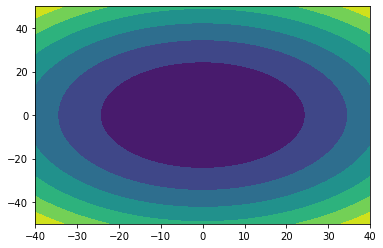

In [139]:
plt.contourf(xx,yy,z)

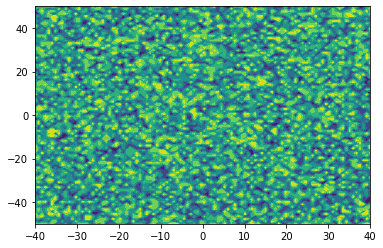

In [144]:
z=np.random.random((90,100)) # THE SHAPE OF THE MAPPING FUNCTION VALUE MUST BE EQUAL TO THE xx and yy
plt.contourf(xx,yy,z)

In [145]:
### creating meshgrid for our knn classifier

In [157]:
# Taking only 2 feature just to make 2d graph
X=df.iloc[:,:2]
y=df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [158]:
# just converting the dataframe into the array
X_train=np.array(X_train)
y_train=np.array(y_train)

In [159]:
X_train

array([[5.7, 2.9],
       [7.6, 3. ],
       [5.6, 3. ],
       [5.1, 3.5],
       [7.7, 2.8],
       [5.8, 2.7],
       [5.2, 3.4],
       [5. , 3.5],
       [5.1, 3.8],
       [5. , 2. ],
       [6.3, 2.7],
       [4.8, 3.4],
       [5. , 3. ],
       [5.1, 3.3],
       [5.6, 2.7],
       [5.1, 3.4],
       [5.7, 3. ],
       [7.7, 3.8],
       [4.6, 3.2],
       [6.2, 2.9],
       [5.7, 2.5],
       [5.5, 4.2],
       [6. , 3. ],
       [5.8, 2.7],
       [6. , 2.2],
       [5.4, 3. ],
       [6.2, 3.4],
       [5.5, 2.3],
       [5.4, 3.9],
       [5. , 2.3],
       [6.4, 2.7],
       [5. , 3.3],
       [5. , 3.2],
       [5.5, 2.4],
       [6.7, 3. ],
       [4.9, 3.1],
       [5.8, 2.8],
       [5. , 3.4],
       [5. , 3.5],
       [5.9, 3.2],
       [5.1, 2.5],
       [6.9, 3.2],
       [6. , 2.7],
       [6.1, 2.6],
       [7.7, 3. ],
       [5.5, 2.5],
       [4.4, 2.9],
       [4.3, 3. ],
       [6. , 2.2],
       [7.2, 3.2],
       [4.6, 3.1],
       [5.1, 3.5],
       [4.4,

In [163]:
## here we are defining x and y axis
a=np.arange(X_train[:,0].min()-1,X_train[:,0].max()+1,step=0.01)
b=np.arange(X_train[:,1].min()-1,X_train[:,1].max()+1,step=0.01)

In [176]:
xx,yy=np.meshgrid(a,b)

array([[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.01, 1.01, 1.01, ..., 1.01, 1.01, 1.01],
       [1.02, 1.02, 1.02, ..., 1.02, 1.02, 1.02],
       ...,
       [5.17, 5.17, 5.17, ..., 5.17, 5.17, 5.17],
       [5.18, 5.18, 5.18, ..., 5.18, 5.18, 5.18],
       [5.19, 5.19, 5.19, ..., 5.19, 5.19, 5.19]])

In [169]:
xx.shape

(420, 540)

In [170]:
yy.shape

(420, 540)

In [177]:
print(xx[0][0])
print(yy[0][0])

3.3
1.0


In [180]:
knn_new=KNeighborsClassifier()

knn_new.fit(X_train,y_train)

KNeighborsClassifier()

In [182]:
# see the prediction will happen like this . we need to provide the input 
# of the first feature and then the second feature
knn_new.predict(np.array([3.3,1.0]).reshape(1,2))

array([1], dtype=int64)

In [197]:
""" but we do not have or data in desired format , to do that we will
first convert the xx and yy into 1-d and then we will make array out of it 
after all this we will transpose it to get the first col and second column as my input feature 
NOTE: PLEASE ALSO TAKE CARE OF THE SHAPE OF THE INPUT DATA IT SHOULD BE SANME AS THE COLUMN SHAPE OF THE TRAINING DATA

"""
np.array([xx.ravel(),yy.ravel()]).T

array([[3.3 , 1.  ],
       [3.31, 1.  ],
       [3.32, 1.  ],
       ...,
       [8.67, 5.19],
       [8.68, 5.19],
       [8.69, 5.19]])

In [198]:
np.array([xx.ravel(),yy.ravel()]).T.shape ## see we have 2 column 

(226800, 2)

In [199]:
input_array=np.array([xx.ravel(),yy.ravel()]).T

In [203]:
label=knn_new.predict(input_array)

In [204]:
label

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

### plotting the array image

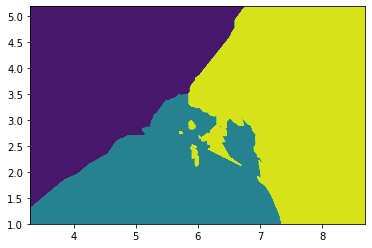

In [205]:
plt.contourf(xx,yy,label.reshape(xx.shape))
# shape of xx,yy,labels should be same

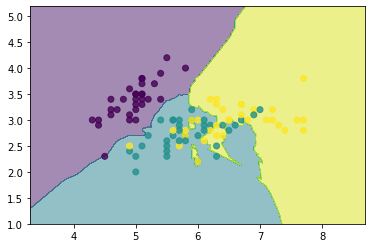

In [211]:
plt.contourf(xx,yy,label.reshape(xx.shape),alpha=0.5)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,alpha=0.8)